In [116]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pkl
import sys
import os
from tqdm import tqdm
from collections import Counter

sys.path.append('../mbspbs10pc/')

from mbspbs10pc import __path__ as home
from mbspbs10pc.utils import show_most_frequent
%matplotlib inline

# Uncover weird jump in diabete users of 2010

In [11]:
root = '../../../data/'
pbs_files = filter(lambda x: x.startswith('PBS'), os.listdir(root))
pbs_files_fullpath = [os.path.join(root, pbs) for pbs in pbs_files]

In [42]:
cc = pkl.load(open('../tmp/dump_cc_.pkl','rb')) # continuously and consistently concessionals

In [46]:
_dd = pd.read_csv(os.path.join(home[0], 'data', 'drugs_used_in_diabetes.csv'), header=0) # drugs used in diabetes
for item in _dd.values.ravel():
    if len(item) < 6:
        dd.add(str(0)+item)
    else:
        dd.add(item)

In [49]:
items = dict()
for pbs in tqdm(sorted(pbs_files_fullpath)):
    _pbs = pd.read_csv(pbs, header=0, usecols=['PTNT_ID', 'ITM_CD'])
    _pbs = _pbs.loc[_pbs['ITM_CD'].isin(dd)] # keep only diabetics
    _pbs = _pbs.loc[_pbs['PTNT_ID'].isin(cc)] # keep only concessionals
    items[pbs] = _pbs['ITM_CD'].values.ravel()

100%|██████████| 7/7 [01:16<00:00, 10.99s/it]


In [54]:
sorted_keys = sorted(items.keys())
sorted_keys

['../../../data/PBS_SAMPLE_10PCT_2008.csv',
 '../../../data/PBS_SAMPLE_10PCT_2009.csv',
 '../../../data/PBS_SAMPLE_10PCT_2010.csv',
 '../../../data/PBS_SAMPLE_10PCT_2011.csv',
 '../../../data/PBS_SAMPLE_10PCT_2012.csv',
 '../../../data/PBS_SAMPLE_10PCT_2013.csv',
 '../../../data/PBS_SAMPLE_10PCT_2014.csv']

# Yearly plots

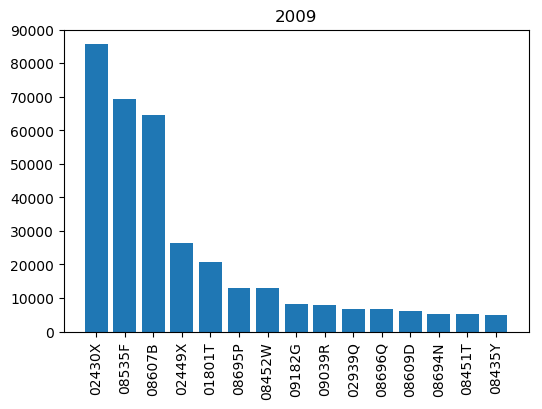

In [217]:
show_most_frequent(items[sorted_keys[1]], top_k=15, column=2009)
plt.ylim([0, 90000])
plt.savefig('../tmp/hist2009.png');

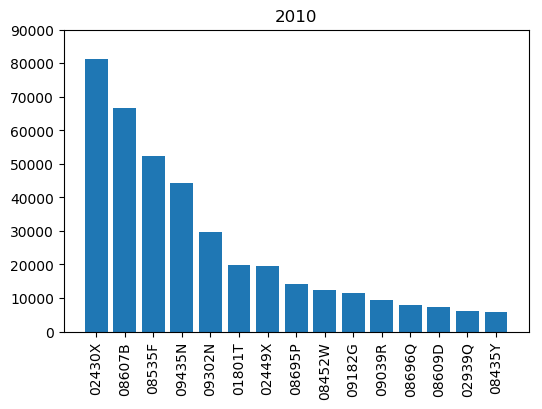

In [218]:
show_most_frequent(items[sorted_keys[2]], top_k=15, column=2010)
plt.ylim([0, 90000])
plt.savefig('../tmp/hist2010.png');

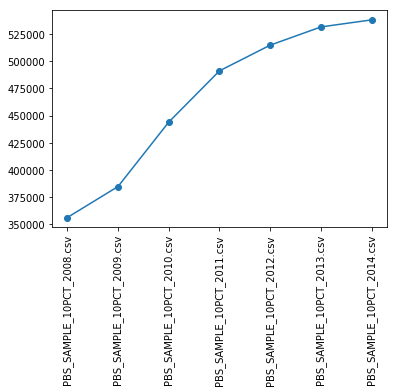

In [72]:
num_items = [len(items[pbs]) for pbs in sorted_keys]
plt.plot(range(len(num_items)), num_items, '-o')
plt.xticks(range(len(num_items)), [pbs.split('/')[-1] for pbs in sorted_keys], rotation='vertical');

# Quantitative measure

In [172]:
counts = {k: Counter(items[k]) for k in sorted_keys}

In [173]:
i = 1
curr = counts[sorted_keys[i]]
last = counts[sorted_keys[i-1]]

In [174]:
diff = {}
for i in range(1, len(counts)):
    print('[{}] diff: {} - {}'.format(i, sorted_keys[i].split('/')[-1], sorted_keys[i-1].split('/')[-1]))
    curr = counts[sorted_keys[i]]
    last = counts[sorted_keys[i-1]]
#     diff[i] = pd.DataFrame.from_dict({item: 100*(1 - (last[item] / curr[item])) for item in curr.keys()},
#                                       orient='index').rename({0: 'COUNTS'}, axis=1) # variation in percent
    diff[i] = pd.DataFrame.from_dict({item: curr[item] - last[item] for item in curr.keys()},
                                      orient='index').rename({0: 'COUNTS'}, axis=1) # absolute variation

[1] diff: PBS_SAMPLE_10PCT_2009.csv - PBS_SAMPLE_10PCT_2008.csv
[2] diff: PBS_SAMPLE_10PCT_2010.csv - PBS_SAMPLE_10PCT_2009.csv
[3] diff: PBS_SAMPLE_10PCT_2011.csv - PBS_SAMPLE_10PCT_2010.csv
[4] diff: PBS_SAMPLE_10PCT_2012.csv - PBS_SAMPLE_10PCT_2011.csv
[5] diff: PBS_SAMPLE_10PCT_2013.csv - PBS_SAMPLE_10PCT_2012.csv
[6] diff: PBS_SAMPLE_10PCT_2014.csv - PBS_SAMPLE_10PCT_2013.csv


In [175]:
i = 1
print('[{}] diff: {} - {}'.format(i, sorted_keys[i].split('/')[-1], sorted_keys[i-1].split('/')[-1]))
print(diff[i].sort_values(by='COUNTS', ascending=False).head(10))
print(diff[i].sort_values(by='COUNTS', ascending=True).head(10))

[1] diff: PBS_SAMPLE_10PCT_2009.csv - PBS_SAMPLE_10PCT_2008.csv
        COUNTS
08535F   10171
09182G    6721
08607B    6243
08695P    4101
08696Q    2318
09039R    1964
09435N    1693
08694N    1291
09181F    1253
08609D     779
        COUNTS
02430X   -2549
02449X   -2510
09062Y   -1269
09060W    -824
02939Q    -791
01801T    -618
08452W    -440
01761Q    -306
02440K    -240
09059T    -233


In [176]:
i = 2
print('[{}] diff: {} - {}'.format(i, sorted_keys[i].split('/')[-1], sorted_keys[i-1].split('/')[-1]))
print(diff[i].sort_values(by='COUNTS', ascending=False).head(10))
print(diff[i].sort_values(by='COUNTS', ascending=True).head(10))

[2] diff: PBS_SAMPLE_10PCT_2010.csv - PBS_SAMPLE_10PCT_2009.csv
        COUNTS
09435N   42645
09302N   29586
09182G    3234
09451K    3135
08607B    2249
03439B    1632
09039R    1496
08696Q    1271
08609D    1112
08695P    1074
        COUNTS
08535F  -17093
02449X   -7050
02430X   -4589
01801T   -1059
02939Q    -691
08452W    -645
08451T    -441
09060W    -314
09062Y    -279
08450R    -228


In [177]:
i = 3
print('[{}] diff: {} - {}'.format(i, sorted_keys[i].split('/')[-1], sorted_keys[i-1].split('/')[-1]))
print(diff[i].sort_values(by='COUNTS', ascending=False).head(10))
print(diff[i].sort_values(by='COUNTS', ascending=True).head(10))

[3] diff: PBS_SAMPLE_10PCT_2011.csv - PBS_SAMPLE_10PCT_2010.csv
        COUNTS
09302N   38252
09435N   22475
03439B   15143
09451K    4515
03415R    2418
09182G    2235
09039R    1967
05476F    1245
03424F    1240
09449H    1164
        COUNTS
08535F  -31934
02430X   -5523
02449X   -3161
01801T   -2006
02939Q   -1097
08695P   -1056
08452W    -915
09062Y    -520
08451T    -371
08694N    -364


In [178]:
i = 4
print('[{}] diff: {} - {}'.format(i, sorted_keys[i].split('/')[-1], sorted_keys[i-1].split('/')[-1]))
print(diff[i].sort_values(by='COUNTS', ascending=False).head(10))
print(diff[i].sort_values(by='COUNTS', ascending=True).head(10))

[4] diff: PBS_SAMPLE_10PCT_2012.csv - PBS_SAMPLE_10PCT_2011.csv
        COUNTS
09302N    6699
09435N    5463
03439B    5421
09451K    5206
05476F    3097
08983T    2415
03387G    2305
09039R    1727
09449H    1460
03424F    1386
        COUNTS
08535F   -3315
02430X   -2859
08695P   -2683
02449X   -1699
01801T   -1409
08607B   -1384
08696Q   -1120
08694N    -965
02939Q    -802
08452W    -790


In [179]:
i = 5
print('[{}] diff: {} - {}'.format(i, sorted_keys[i].split('/')[-1], sorted_keys[i-1].split('/')[-1]))
print(diff[i].sort_values(by='COUNTS', ascending=False).head(10))
print(diff[i].sort_values(by='COUNTS', ascending=True).head(10))

[5] diff: PBS_SAMPLE_10PCT_2013.csv - PBS_SAMPLE_10PCT_2012.csv
        COUNTS
03439B   15260
03387G    5599
09451K    4279
09302N    3103
05476F    2083
08983T    1726
09039R    1480
03424F    1237
09449H    1068
08609D     900
        COUNTS
02430X   -4518
09435N   -4157
08695P   -2484
08607B   -2314
01801T   -2010
08535F   -1453
02449X   -1280
08696Q   -1274
08452W    -966
08694N    -834


In [180]:
i = 6
print('[{}] diff: {} - {}'.format(i, sorted_keys[i].split('/')[-1], sorted_keys[i-1].split('/')[-1]))
print(diff[i].sort_values(by='COUNTS', ascending=False).head(10))
print(diff[i].sort_values(by='COUNTS', ascending=True).head(10))

[6] diff: PBS_SAMPLE_10PCT_2014.csv - PBS_SAMPLE_10PCT_2013.csv
        COUNTS
03439B   10837
03387G    3561
10011X    2260
09451K    2142
05476F    1526
09039R    1425
03424F    1263
10090C    1057
09449H     713
08435Y     673
        COUNTS
02430X   -5284
09435N   -4218
08607B   -4165
01801T   -1740
08695P   -1634
08535F   -1618
08452W   -1315
02449X   -1268
08696Q    -951
08694N    -852


# Following the trend of those drugs

In [213]:
drugs = {'09435N': [], '09302N': [], '08535F': [], '03439B': [], '02430X': []}
for pbs in tqdm(sorted(pbs_files_fullpath)):
    _pbs = pd.read_csv(pbs, header=0, usecols=['PTNT_ID', 'ITM_CD'])
    for k in drugs.keys():
        drugs[k].append(len(_pbs.loc[_pbs['ITM_CD'] == k]))


  0%|          | 0/7 [00:00<?, ?it/s]
Exception in thread Thread-13:
Traceback (most recent call last):
  File "/home/samu/miniconda2/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/home/samu/miniconda2/lib/python2.7/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/samu/miniconda2/lib/python2.7/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration


100%|██████████| 7/7 [01:56<00:00, 16.62s/it]


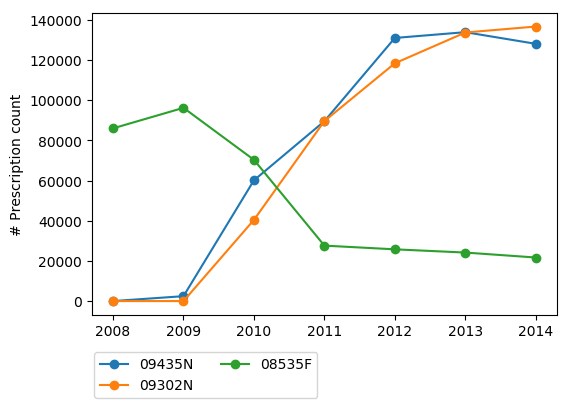

In [214]:
plt.figure(dpi=100)
# for k in drugs.keys():
for k in ['09435N', '09302N', '08535F']:
    plt.plot(np.arange(2008, 2015), drugs[k], '-o', label=k)
plt.ylabel('# Prescription count')
plt.legend(loc=0, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.savefig('../tmp/drugs_trend_all.png');

In [215]:
drugs = {'09435N': [], '09302N': [], '08535F': [], '03439B': [], '02430X': []}
for pbs in tqdm(sorted(pbs_files_fullpath)):
    _pbs = pd.read_csv(pbs, header=0, usecols=['PTNT_ID', 'ITM_CD'])
    _pbs = _pbs.loc[_pbs['PTNT_ID'].isin(cc)] # keep only concessionals
    for k in drugs.keys():
        drugs[k].append(len(_pbs.loc[_pbs['ITM_CD'] == k]))

100%|██████████| 7/7 [02:04<00:00, 17.75s/it]


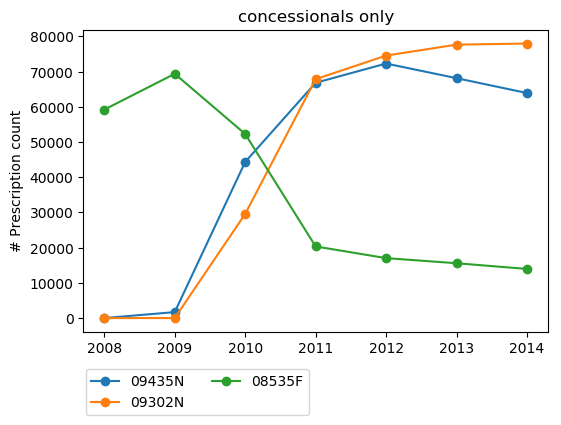

In [216]:
plt.figure(dpi=100)
# for k in drugs.keys():
for k in ['09435N', '09302N', '08535F']:
    plt.plot(np.arange(2008, 2015), drugs[k], '-o', label=k)
plt.ylabel('# Prescription count')
plt.legend(loc=0, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.title('concessionals only')
plt.savefig('../tmp/drugs_trend.png');